### Interaction of BBU1 AVG Power consumption [W] and Total port Tput [Mbps]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset (adjust filename/path as needed)
df = pd.read_excel('Combined dataset in 1-hour interval/B1_beta_merged.xlsx')

# Remove rows with NaN in either 'BBU1 AVG Power consumption [W]' or 'Total port Tput [Mbps]'
df = df.dropna(subset=['BBU1 AVG Power consumption [W]', 'Total port Tput [Mbps]'])

# Convert 'Day of Week' to numerical values (Monday=1, ..., Sunday=7)
df['Day of Week'] = df['Day of Week'].map({
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
    'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
})

# Exclude datetime columns
datetime_columns = df.select_dtypes(include=['datetime64']).columns
df = df.drop(columns=datetime_columns)


In [6]:
import os
# Creating a folder to store the interaction result
folder_name = "Interaction result"

# Check if the folder exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
else:
    print(f"Folder '{folder_name}' already exists.")

Folder 'Interaction result' already exists.


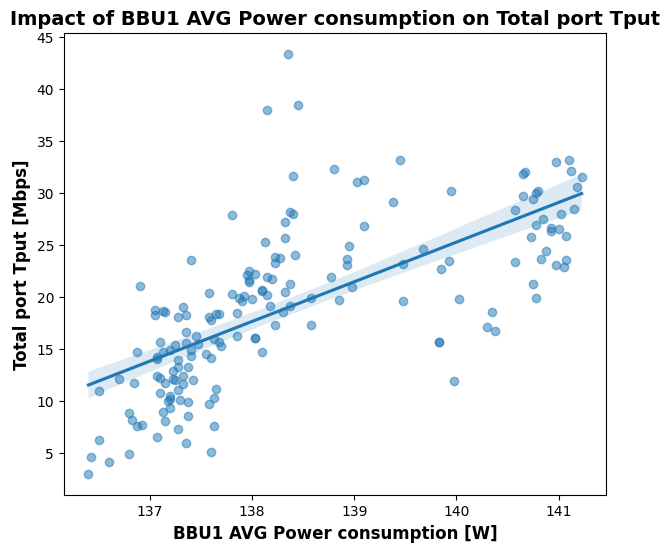

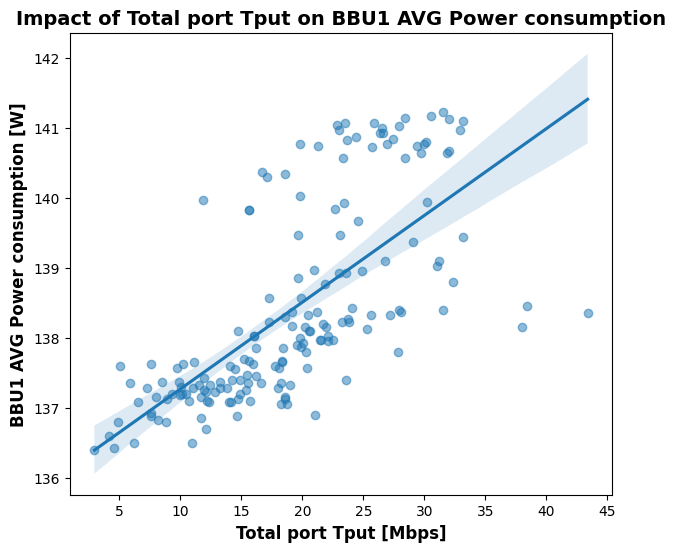

In [7]:
# Graph 1: How BBU1 AVG Power consumption impacts Total port Tput
# This graph shows the relationship between BBU1 AVG Power consumption and Total port Tput.
# The x-axis represents the BBU1 AVG Power consumption in Watts, and the y-axis represents the Total port Tput in Mbps.
# A regression line is plotted to show the trend of how BBU1 AVG Power consumption impacts Total port Tput.

plt.figure(figsize=(7, 6))
sns.regplot(data=df, 
            x='BBU1 AVG Power consumption [W]', 
            y='Total port Tput [Mbps]', 
            scatter_kws={'alpha':0.5})
plt.title("Impact of BBU1 AVG Power consumption on Total port Tput", fontsize=14, fontweight='bold')
plt.xlabel("BBU1 AVG Power consumption [W]", fontsize=12, fontweight='bold')
plt.ylabel("Total port Tput [Mbps]", fontsize=12, fontweight='bold')
plt.savefig(f"{folder_name}/Impact_of_BBU1_Power_on_Total_Tput.png", dpi=300)
plt.show()

# Graph 2: How Total port Tput impacts BBU1 AVG Power consumption
# This graph shows the relationship between Total port Tput and BBU1 AVG Power consumption.
# The x-axis represents the Total port Tput in Mbps, and the y-axis represents the BBU1 AVG Power consumption in Watts.
# A regression line is plotted to show the trend of how Total port Tput impacts BBU1 AVG Power consumption.

plt.figure(figsize=(7, 6))
sns.regplot(data=df, 
            x='Total port Tput [Mbps]', 
            y='BBU1 AVG Power consumption [W]', 
            scatter_kws={'alpha':0.5})
plt.title("Impact of Total port Tput on BBU1 AVG Power consumption", fontsize=14, fontweight='bold')
plt.xlabel("Total port Tput [Mbps]", fontsize=12, fontweight='bold')
plt.ylabel("BBU1 AVG Power consumption [W]", fontsize=12, fontweight='bold')
plt.savefig(f"{folder_name}/Impact_of_Total_Tput_on_BBU1_Power.png", dpi=300)
plt.show()

c:\Users\Viet Anh Phan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Viet Anh Phan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


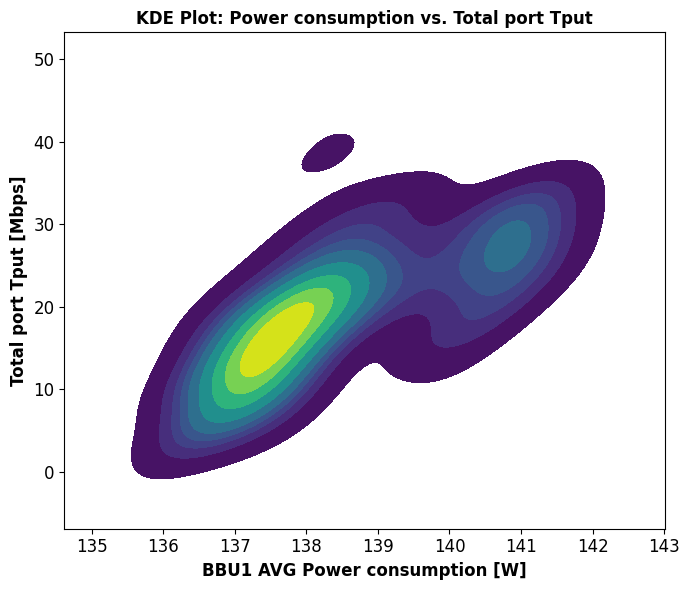

In [18]:
plt.figure(figsize=(7, 6))
sns.kdeplot(x='BBU1 AVG Power consumption [W]', y='Total port Tput [Mbps]', data=df, fill=True, cmap='viridis', thresh=0.05)
plt.xlabel('BBU1 AVG Power consumption [W]', fontsize=12, fontweight='bold')
plt.ylabel('Total port Tput [Mbps]', fontsize=12, fontweight='bold')
plt.title('KDE Plot: Power consumption vs. Total port Tput', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
output_path = f"{folder_name}/KDE_Plot_Power_vs_Tput.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

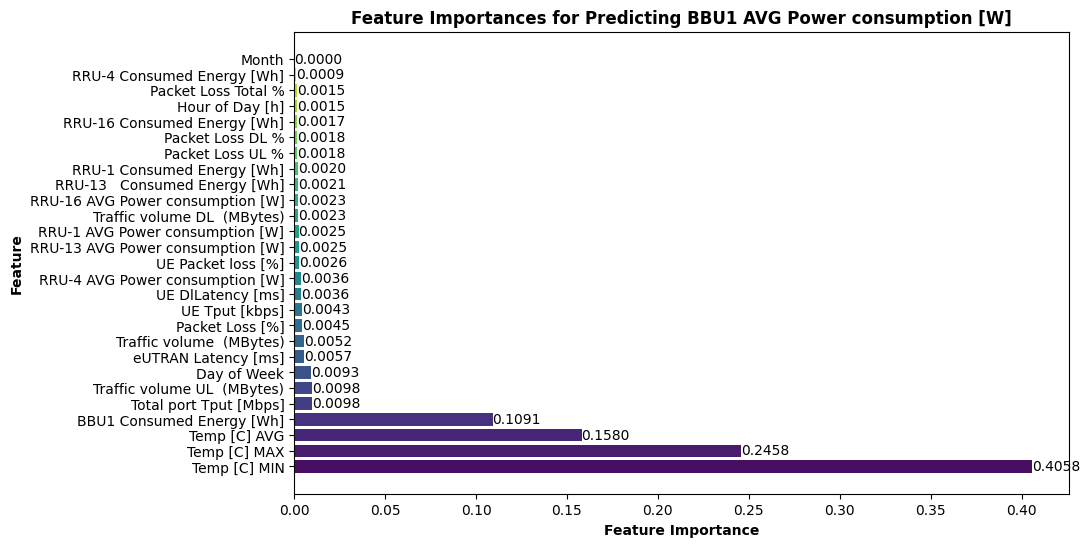

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define a new dataframe for power consumption analysis
df_power = df.copy()

# Define the features and target
X = df_power.drop(columns=['BBU1 AVG Power consumption [W]'])
y = df_power['BBU1 AVG Power consumption [W]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(sorted_importances))
bars = plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importances for Predicting BBU1 AVG Power consumption [W]', fontweight='bold')

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', 
             va='center', ha='left', fontsize=10, color='black')

# Save the plot
plt.savefig(f"{folder_name}/Feature_Importances_BBU1_Power.png", dpi=300, bbox_inches='tight')
plt.show()


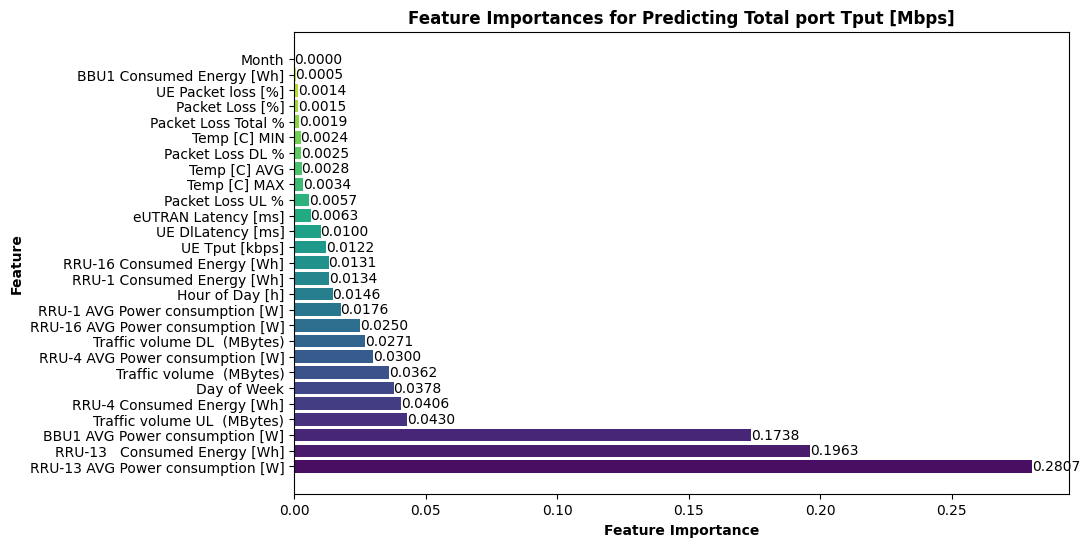

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define a new dataframe for throughput analysis
df_throughput = df.copy()

# Define the features and target
X = df_throughput.drop(columns=['Total port Tput [Mbps]'])
y = df_throughput['Total port Tput [Mbps]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(sorted_importances))
bars = plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importances for Predicting Total port Tput [Mbps]', fontweight='bold')

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', 
             va='center', ha='left', fontsize=10, color='black')

# Save the plot
plt.savefig(f"{folder_name}/Feature_Importances_Total_Tput.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1000x600 with 0 Axes>

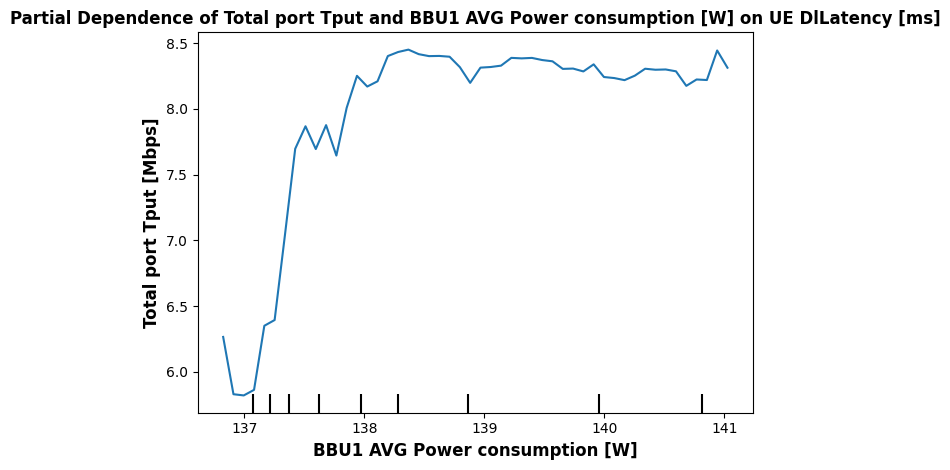

c:\Users\Viet Anh Phan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


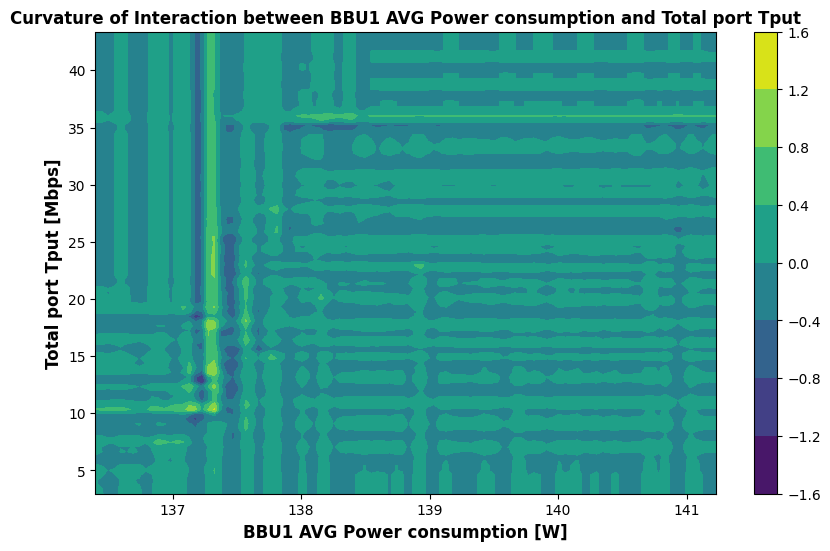

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import matplotlib.pyplot as plt

# Define the features and target
X = df[['BBU1 AVG Power consumption [W]', 'Total port Tput [Mbps]']]
y = df['UE DlLatency [ms]']

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot partial dependence
plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf, X, [0], grid_resolution=50)
plt.title('Partial Dependence of Total port Tput and BBU1 AVG Power consumption [W] on UE DlLatency [ms]', fontsize=12, fontweight='bold')
plt.xlabel('BBU1 AVG Power consumption [W]', fontsize=12, fontweight='bold')
plt.ylabel('Total port Tput [Mbps]', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{folder_name}/Partial_Dependence_Plots_Power_Tput.png", dpi=300)
plt.show()

# Calculate curvature (second derivative)
xx, yy = np.meshgrid(np.linspace(X['BBU1 AVG Power consumption [W]'].min(), X['BBU1 AVG Power consumption [W]'].max(), 100),
                     np.linspace(X['Total port Tput [Mbps]'].min(), X['Total port Tput [Mbps]'].max(), 100))
zz = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
curvature = np.gradient(np.gradient(zz)[0])[0] + np.gradient(np.gradient(zz)[1])[1]

# Plot curvature
plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, curvature, cmap='viridis')
plt.colorbar(contour)
plt.title('Curvature of Interaction between BBU1 AVG Power consumption and Total port Tput', fontsize=12, fontweight='bold')
plt.xlabel('BBU1 AVG Power consumption [W]', fontsize=12, fontweight='bold')
plt.ylabel('Total port Tput [Mbps]', fontsize=12, fontweight='bold')
plt.savefig(f"{folder_name}/Curvature_Plot_Power_Tput.png", dpi=300)
plt.show()


### Interaction of Traffic Volume (MBytes) and UE DlLatency [ms]

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset (adjust filename/path as needed)
df = pd.read_excel('Combined dataset in 1-hour interval/B1_beta_merged.xlsx')

# Remove rows with NaN in either 'Traffic Volume  (Mbytes)' or 'UE DlLatency [ms]'
df = df.dropna(subset=['Traffic volume  (MBytes)', 'UE DlLatency [ms]'])

# Convert 'Day of Week' to numerical values (Monday=1, ..., Sunday=7)
df['Day of Week'] = df['Day of Week'].map({
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
    'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
})

# Exclude datetime columns
datetime_columns = df.select_dtypes(include=['datetime64']).columns
df = df.drop(columns=datetime_columns)


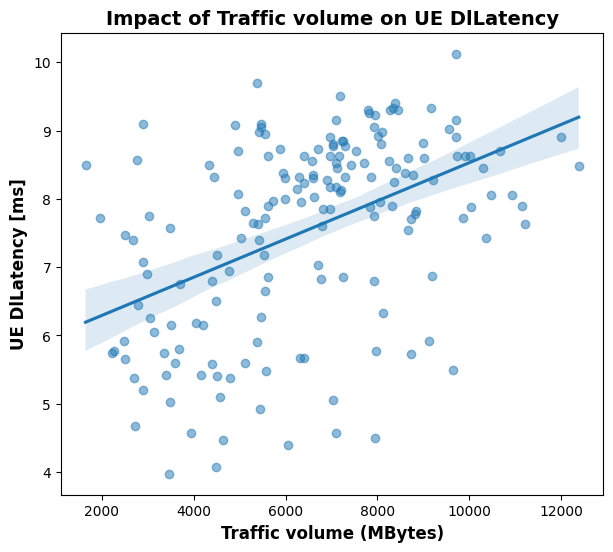

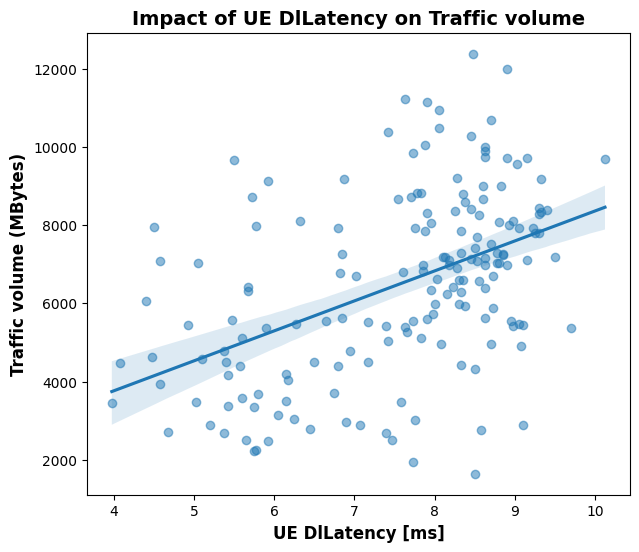

In [40]:
# Graph 1: How Traffic volume (MBytes) impacts UE DlLatency [ms]
# This graph shows the relationship between Traffic volume (MBytes) and UE DlLatency [ms].
# The x-axis represents the Traffic volume in MBytes, and the y-axis represents the UE DlLatency in ms.
# A regression line is plotted to show the trend of how Traffic volume impacts UE DlLatency.

plt.figure(figsize=(7, 6))
sns.regplot(data=df, 
            x='Traffic volume  (MBytes)', 
            y='UE DlLatency [ms]', 
            scatter_kws={'alpha':0.5})
plt.title("Impact of Traffic volume on UE DlLatency", fontsize=14, fontweight='bold')
plt.xlabel("Traffic volume (MBytes)", fontsize=12, fontweight='bold')
plt.ylabel("UE DlLatency [ms]", fontsize=12, fontweight='bold')
plt.savefig(f"{folder_name}/Impact_of_Traffic_Volume_on_UE_DlLatency.png", dpi=300)
plt.show()

# Graph 2: How UE DlLatency impacts Traffic volume (MBytes)
# This graph shows the relationship between UE DlLatency and Traffic volume (MBytes).
# The x-axis represents the UE DlLatency in ms, and the y-axis represents the Traffic volume in MBytes.
# A regression line is plotted to show the trend of how UE DlLatency impacts Traffic volume.

plt.figure(figsize=(7, 6))
sns.regplot(data=df, 
            x='UE DlLatency [ms]', 
            y='Traffic volume  (MBytes)', 
            scatter_kws={'alpha':0.5})
plt.title("Impact of UE DlLatency on Traffic volume", fontsize=14, fontweight='bold')
plt.xlabel("UE DlLatency [ms]", fontsize=12, fontweight='bold')
plt.ylabel("Traffic volume (MBytes)", fontsize=12, fontweight='bold')
plt.savefig(f"{folder_name}/Impact_of_UE_DlLatency_on_Traffic_Volume.png", dpi=300)
plt.show()

c:\Users\Viet Anh Phan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Viet Anh Phan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


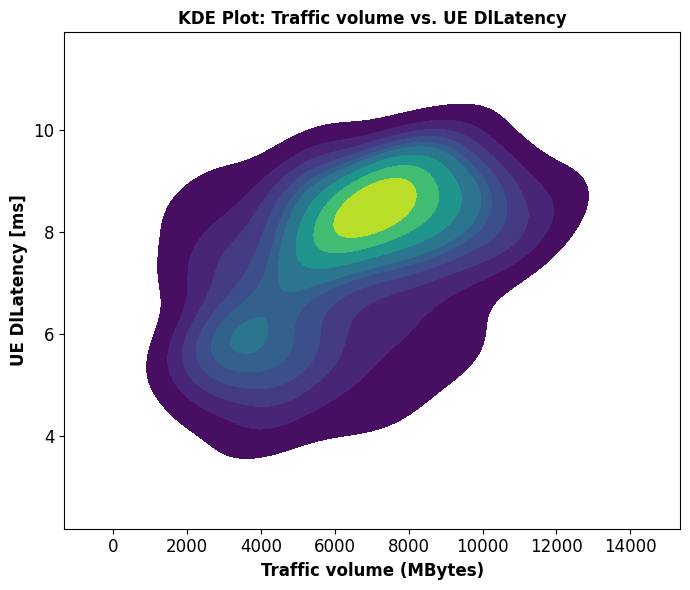

In [41]:
plt.figure(figsize=(7, 6))
sns.kdeplot(x='Traffic volume  (MBytes)', y='UE DlLatency [ms]', data=df, fill=True, cmap='viridis', thresh=0.05)
plt.xlabel('Traffic volume (MBytes)', fontsize=12, fontweight='bold')
plt.ylabel('UE DlLatency [ms]', fontsize=12, fontweight='bold')
plt.title('KDE Plot: Traffic volume vs. UE DlLatency', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
output_path = f"{folder_name}/KDE_Plot_Traffic_vs_UE_DlLatency.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

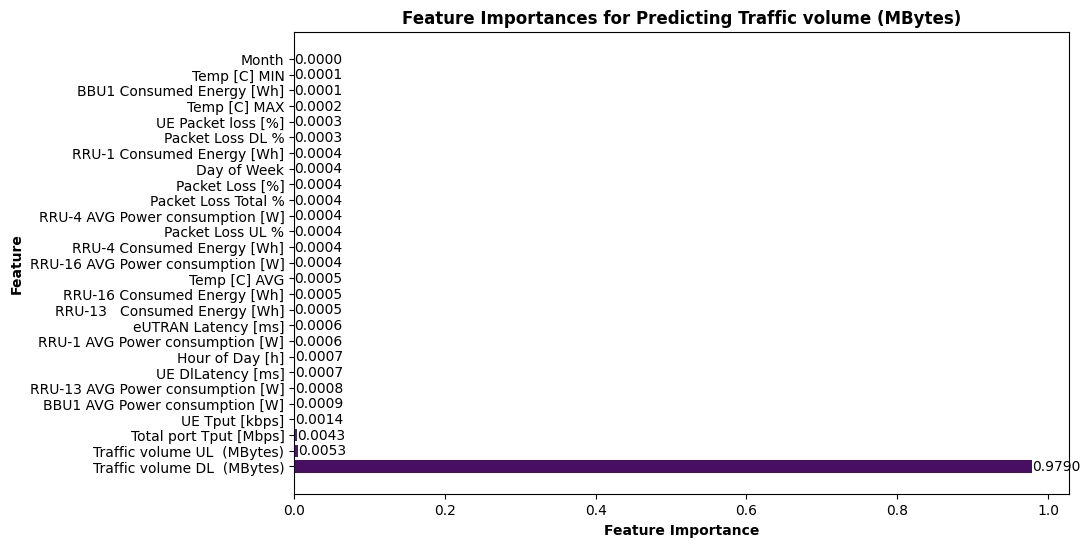

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define a new dataframe for traffic volume analysis
df_traffic = df.copy()

# Define the features and target
X = df_traffic.drop(columns=['Traffic volume  (MBytes)'])
y = df_traffic['Traffic volume  (MBytes)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(sorted_importances))
bars = plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importances for Predicting Traffic volume (MBytes)', fontweight='bold')

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', 
             va='center', ha='left', fontsize=10, color='black')

# Save the plot
plt.savefig(f"{folder_name}/Feature_Importances_Traffic_Volume.png", dpi=300, bbox_inches='tight')
plt.show()


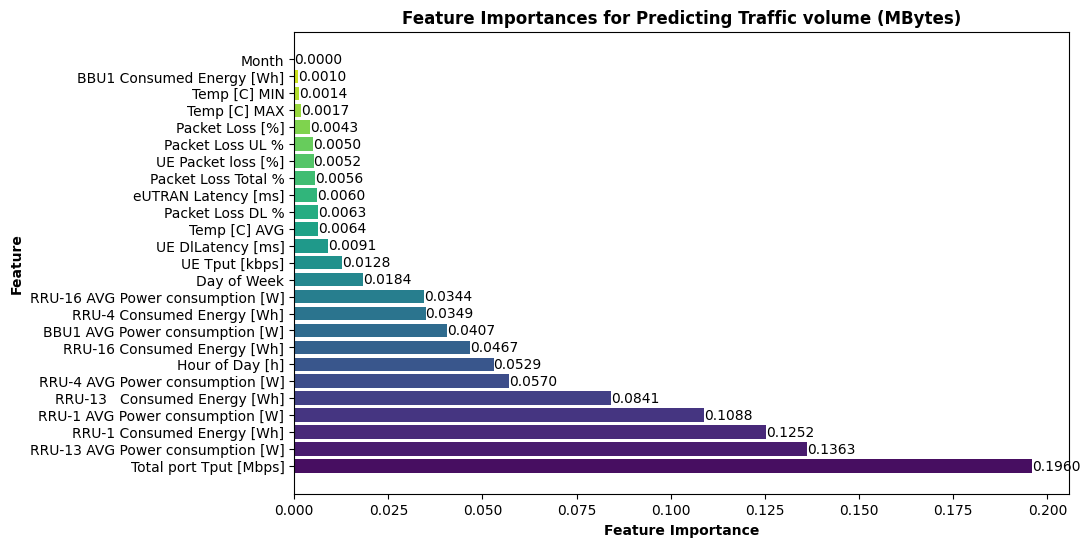

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define a new dataframe for traffic volume analysis
df_traffic = df.copy()

# Define the features and target, excluding 'Traffic volume UL (MBytes)' and 'Traffic volume DL (MBytes)'
X = df_traffic.drop(columns=['Traffic volume  (MBytes)', 'Traffic volume UL  (MBytes)', 'Traffic volume DL  (MBytes)'])
y = df_traffic['Traffic volume  (MBytes)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(sorted_importances))
bars = plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importances for Predicting Traffic volume (MBytes)', fontweight='bold')

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', 
             va='center', ha='left', fontsize=10, color='black')

# Save the plot
plt.savefig(f"{folder_name}/Feature_Importances_Traffic_Volume_modified.png", dpi=300, bbox_inches='tight')
plt.show()

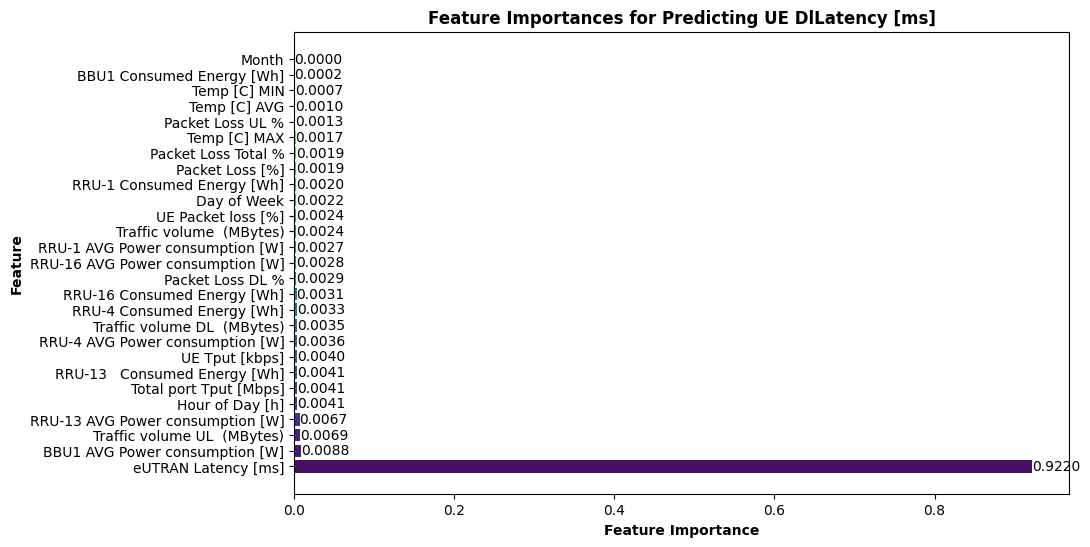

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define a new dataframe for latency analysis
df_latency = df.copy()

# Define the features and target
X = df_latency.drop(columns=['UE DlLatency [ms]'])
y = df_latency['UE DlLatency [ms]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(sorted_importances))
bars = plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importances for Predicting UE DlLatency [ms]', fontweight='bold')

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', 
             va='center', ha='left', fontsize=10, color='black')

# Save the plot
plt.savefig(f"{folder_name}/Feature_Importances_UE_DlLatency.png", dpi=300, bbox_inches='tight')
plt.show()

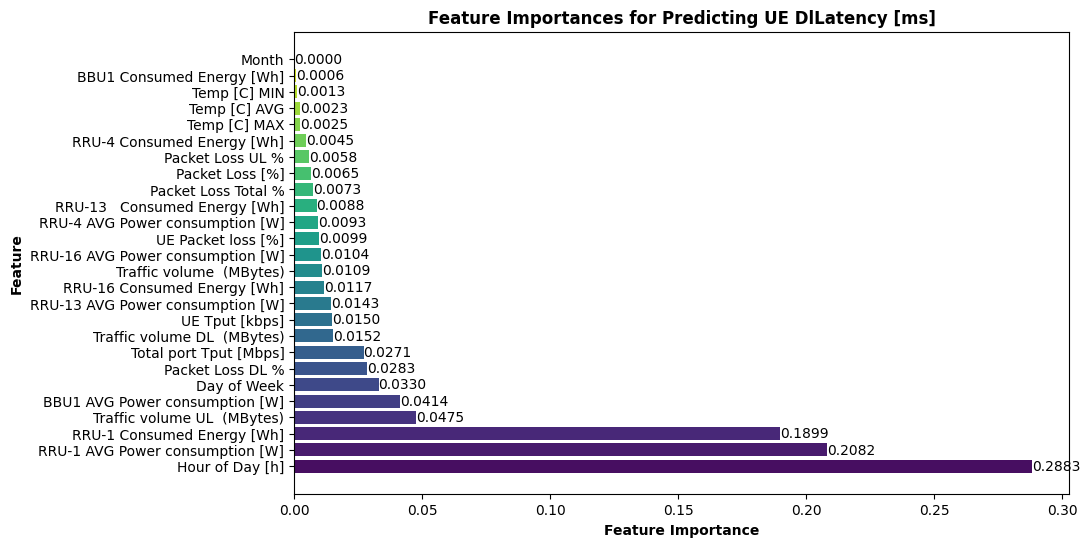

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define a new dataframe for latency analysis
df_latency = df.copy()

# Define the features and target, excluding 'eUTRAN Latency [ms]'
X = df_latency.drop(columns=['UE DlLatency [ms]', 'eUTRAN Latency [ms]'])
y = df_latency['UE DlLatency [ms]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(sorted_importances))
bars = plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importances for Predicting UE DlLatency [ms]', fontweight='bold')

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', 
             va='center', ha='left', fontsize=10, color='black')

# Save the plot
plt.savefig(f"{folder_name}/Feature_Importances_UE_DlLatency_modified.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

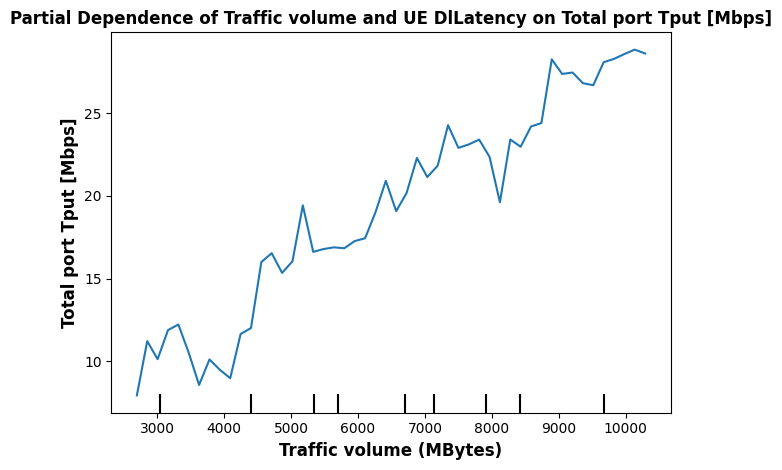

c:\Users\Viet Anh Phan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


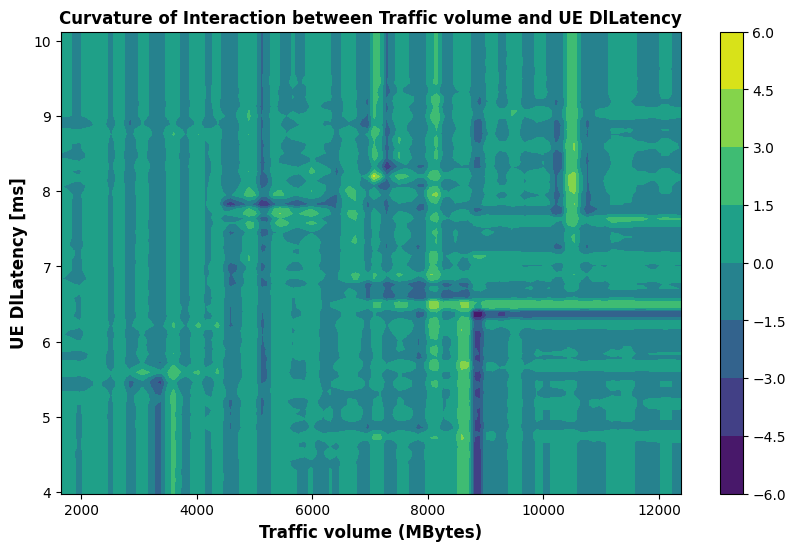

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import matplotlib.pyplot as plt

# Define the features and target
X = df[['Traffic volume  (MBytes)', 'UE DlLatency [ms]']]
y = df['Total port Tput [Mbps]']

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot partial dependence
plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf, X, [0], grid_resolution=50)
plt.title('Partial Dependence of Traffic volume and UE DlLatency on Total port Tput [Mbps]', fontsize=12, fontweight='bold')
plt.xlabel('Traffic volume (MBytes)', fontsize=12, fontweight='bold')
plt.ylabel('Total port Tput [Mbps]', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{folder_name}/Partial_Dependence_Plots_Traffic_Latency.png", dpi=300)
plt.show()

# Calculate curvature (second derivative)
xx, yy = np.meshgrid(np.linspace(X['Traffic volume  (MBytes)'].min(), X['Traffic volume  (MBytes)'].max(), 100),
                     np.linspace(X['UE DlLatency [ms]'].min(), X['UE DlLatency [ms]'].max(), 100))
zz = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
curvature = np.gradient(np.gradient(zz)[0])[0] + np.gradient(np.gradient(zz)[1])[1]

# Plot curvature
plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, curvature, cmap='viridis')
plt.colorbar(contour)
plt.title('Curvature of Interaction between Traffic volume and UE DlLatency', fontsize=12, fontweight='bold')
plt.xlabel('Traffic volume (MBytes)', fontsize=12, fontweight='bold')
plt.ylabel('UE DlLatency [ms]', fontsize=12, fontweight='bold')
plt.savefig(f"{folder_name}/Curvature_Plot_Traffic_Latency.png", dpi=300)
plt.show()
